## Clean And Analyze Employee Exit Surveys

I'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here ([link](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)) and the survey for the DETE here ([link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)). One of the surveys customized some of the answers.

I will try to answer the questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Here is a preview of a several columns from the dete_survey.csv:

* **ID:** An id used to identify the participant of the survey
* **SeparationType:** The reason why the person's employment ended
* **Cease Date:** The year or month the person's employment ended
* **DETE Start Date:** The year the person began employment with the DETE

Here is a preview of a couple columns from the tafe_survey.csv:

* **Record ID:** An id used to identify the participant of the survey
* **Reason for ceasing employment:** The reason why the person's employment ended
* **LengthofServiceOverall. Overall Length of Service at Institute (in years):** The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [20]:
import pandas as pd
import numpy as np

# read data from files
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

# explore data: DETE survey
dete_survey.info()
dete_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
# amount of null values in DETE
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [14]:
# explore data: TAFE survey
tafe_survey.info()
tafe_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [19]:
# amount of null values in TAFE
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Observations:

* the `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as NaN.
* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that don't need for analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Delete unuseful columns

* Read file with NaN instead 'Not Stated':

In [21]:
dete_survey = pd.read_csv("dete_survey.csv", na_values=['Not Stated'])

* drop some columns from each dataframe that do not need for analysis to make the dataframes easier to work with:

In [22]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Rename columns

Each dataframe contains many of the same columns, but the column names are different. Also columns should have the identical names to combine them later.

In [26]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

Rename the remaining columns in the `dete_survey_updated` dataframe:
* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').

In [29]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [30]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

Rename the columns in `tafe_survey_updated`:

In [31]:
mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [32]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [33]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Columns became readable and short. It helps to understand data better.

## Remove more of the data

End goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The unique values in the separationtype columns in each dataframe contains a couple of different separation types. For analyze survey leave respondents who resigned, so their separation type contains the string 'Resignation'.

Review the unique values in the separationtype column in both `dete_survey_updated` and `tafe_survey_updated`:

In [34]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [35]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [47]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.split("-").str.get(0) == 'Resignation'].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [42]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In data set DETE 150 + 91 + 70 rows remained with 3 types of Resignation reasons. In data set TAFE 340 rows remained.

## Verify Date columns

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If there are many years higher than the current date or lower than 1940, no reason to continue analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, remove them.

* Check the years in each dataframe for logical inconsistencies:

In [60]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [65]:
# extract the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split("/").str.get(-1)
# convert the type to a float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [70]:
# view the highest and lowest values with their counts
print("DETE cease date:")
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False))
print("DETE start date:")
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))
print("TAFE cease date:")
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))

DETE cease date:
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
DETE start date:
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64
TAFE cease date:
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years.

## Create a new column

Recall that the goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The `tafe_resignations` dataframe already contains a "service" column, which renamed to institute_service. In order to analyze both surveys together create a corresponding `institute_service` column in `dete_resignations`.



In [71]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

DETE do not have "service" column, but it can be calculated from the start date in DETE and date of resignation.

## Identify dissatisfied employees

Use this columns to categorize employees as "dissatisfied" from each dataframe: 

`tafe_survey_updated`:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

`dafe_survey_updated`:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, mark them as dissatisfied in a new column.

In [72]:
# view values in TAFE
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [73]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [81]:
# create helper function
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    return True

# apply helper function to fill columns with True/False/NaN
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

# create a dissatisfied column in tafe_resignations and dete_resignations:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department', 
                                                       'physical_work_environment',
                                                       'lack_of_recognition', 
                                                       'lack_of_job_security', 
                                                       'work_location', 
                                                       'employment_conditions', 
                                                       'work_life_balance', 
                                                       'workload']].any(axis=1, skipna=False)

# create a copy of the results:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy() 

print(tafe_resignations['dissatisfied'].head(10))
print(dete_resignations['dissatisfied'].head(10))

3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
13    True
14    True
Name: dissatisfied, dtype: object
3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
Name: dissatisfied, dtype: bool


After changes, the new dissatisfied column will contain just the following values:

* **True:** indicates a person resigned because they were dissatisfied with the job
* **False:** indicates a person resigned because of a reason other than dissatisfaction with the job
* **NaN:** indicates the value is missing

## Combine the data

It is time to combine datasets! End goal is to aggregate the data according to the `institute_service` column.

In [189]:
# add a column to each dataframe that allow to distinguish between the two datasets:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# combine the dataframes:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True, sort=True)

# drop any columns with less than 500 non null values:
combined_updated = combined.dropna(axis=1, thresh=500)

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


## Clean the 'service' column

Understand `institute_service` column:

In [190]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

To analyze the data convert these numbers into categories. Try understand employee's needs according to career stage instead of age is more effective.

Categories:

* **New:** Less than 3 years at a company
* **Experienced:** 3-6 years at a company
* **Established:** 7-10 years at a company
* **Veteran:** 11 or more years at a company

Let's categorize the values in the `institute_service` column:

In [228]:
## extract the years of service from each value in the institute_service column
# extract the years of service from each pattern:
(combined_updated['institute_service']
 .astype('str')
 .str.split(r'[.-]').str.get(0)
 .str.replace('Less than 1 year','1')
 .str.replace('More than 20 years','20'))

combined_updated.loc[:, 'institute_service'] = combined_updated.loc[:, 'institute_service'].astype('float')

# map each value to one of the career stage definitions above:

def split_to_category(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return "New"
    elif element >= 3 and element < 7:
        return "Experienced"
    elif element >= 7 and element < 11:
        return "Established"
    return "Veteran"

combined_updated.loc[:,'service_cat'] = combined_updated.loc[:,'institute_service'].apply(split_to_category)

combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [221]:
combined_updated[['institute_service','service_cat']].head(10)

,institute_service,service_cat
0,7.0,Established
1,18.0,Veteran
2,3.0,Experienced
3,15.0,Veteran
4,3.0,Experienced
5,14.0,Veteran
6,5.0,Experienced
7,NaN,NaN
8,30.0,Veteran
9,32.0,Veteran


## Initial analysis

Fill in missing values in the dissatisfied column and then aggregate the data.


In [223]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     481
False    162
NaN        8
Name: dissatisfied, dtype: int64

In [226]:
# replace the missing values in the dissatisfied column with the value that occurs most frequently in this column:
combined_updated.loc[:,'dissatisfied'] = combined_updated.loc[:,'dissatisfied'].fillna(True)
combined_updated['dissatisfied'].value_counts(dropna=False)

True     489
False    162
Name: dissatisfied, dtype: int64

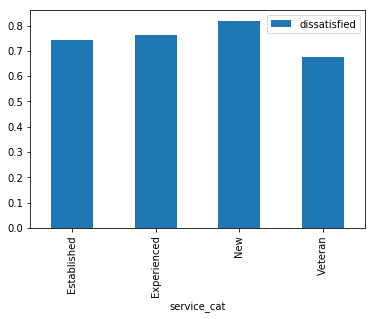

In [231]:
# calculate the percentage of dissatisfied employees in each service_cat group:
pv_combined_updated = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# plot the results:
%matplotlib inline
pv_combined_updated.plot(kind='bar')

Among all resigend employees "veterans" less dissatisfied, "new" employees moredissatisfied.